In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [6]:
# подключение диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# данные: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?resource=download
data = pd.read_csv('/content/drive/My Drive/mental health dataset.csv')

In [8]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [9]:
# размерность данных
data.shape

(1259, 27)

In [10]:
# информация о признаках
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [11]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


Видим, что max возраст очень большой, а min очень маленький

In [47]:
# преобразуем
data2 = data[data['Age'] <= 70]
data2 = data2[data2['Age'] >= 15]
data2.shape

(1250, 27)

In [13]:
data2.describe()

,Age
count,1250.000000
mean,32.044800
std,7.203076
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


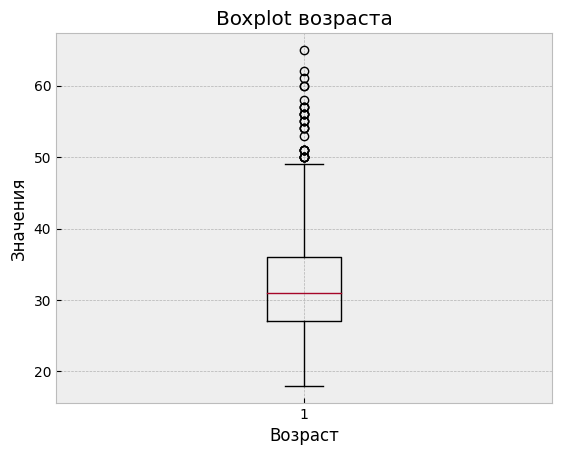

In [14]:
plt.boxplot(data2['Age'])

# Добавление названия осей
plt.xlabel('Возраст')
plt.ylabel('Значения')

# Добавление заголовка
plt.title('Boxplot возраста')

# Отображение графика
plt.show()

Возьмем разброс возраста с 15 до 70 лет

Средний возраст оправшиваемых примерно 30 лет, значения колеблятся от 15 до 50

In [15]:
data2.duplicated().sum()

0

In [16]:
data2.drop_duplicates()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [17]:
data2.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1089
dtype: int64

In [48]:
# Функция, преобразующая данные в числовой формат
def strToInt(str):
  if(str == 'No'):
    number = 0
  elif(str == 'Yes'):
    number = 1
  elif(str == 'Maybe'):
    number = 2
  elif(str == "Don't know"):
    number = 3
  elif(str == "Not sure"):
    number = 4
  elif(str == "Somewhat easy"):
    number = 5
  elif(str == "Somewhat difficult"):
    number = 6
  elif(str == "Some of them"):
    number = 7
  else:
    number = -1
  return number

In [49]:
# преобразование столбца к числовому формату
data2['family_history'] = data2['family_history'].apply(strToInt)
data2['treatment'] = data2['treatment'].apply(strToInt)
data2['mental_health_consequence'] = data2['mental_health_consequence'].apply(strToInt)
data2['remote_work'] = data2['remote_work'].apply(strToInt)
data2['tech_company'] = data2['tech_company'].apply(strToInt)
data2['benefits'] = data2['benefits'].apply(strToInt)

In [50]:
data2['care_options'] = data2['care_options'].apply(strToInt)
data2['wellness_program'] = data2['wellness_program'].apply(strToInt)
data2['seek_help'] = data2['seek_help'].apply(strToInt)
data2['anonymity'] = data2['anonymity'].apply(strToInt)
data2['leave'] = data2['leave'].apply(strToInt)
data2['phys_health_consequence'] = data2['phys_health_consequence'].apply(strToInt)
data2['coworkers'] = data2['coworkers'].apply(strToInt)
data2['supervisor'] = data2['supervisor'].apply(strToInt)
data2['mental_health_interview'] = data2['mental_health_interview'].apply(strToInt)
data2['phys_health_interview'] = data2['phys_health_interview'].apply(strToInt)
data2['mental_vs_physical'] = data2['mental_vs_physical'].apply(strToInt)
data2['obs_consequence'] = data2['obs_consequence'].apply(strToInt)

In [44]:
data2['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [51]:
# Функция, преобразующая столбец с влиянием ментального состояния на работу в числовой вид
def strToInt2(str):
  if(str == 'Often'):
    number = 10
  elif(str == 'Rarely'):
    number = 11
  elif(str == 'Never'):
    number = 12
  elif(str == 'Sometimes'):
    number = 13
  else:
    number = -1
  return number

data2['work_interfere'] = data2['work_interfere'].apply(strToInt2)

In [53]:
data2['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [57]:
# Функция, которая преобразует пол в числовое значение 0 - женщина, 1 - мужчина, иное (в том числе и опечатки) -1
def GenderToInt(str):
  if (str == "Female" or str == "female"
      or str == "Cis Female" or str == "F"
      or str == "f" or str == "Woman"
      or str == "woman" or str == "Female "
      or str == "Female (cis)"):
    number = 0
  elif (str == "M" or str == "Male"
        or str == "male" or str == "m"
        or str == "Cis Male" or str == "Male (CIS)"
        or str == "Male " or str == "Man"
        or str == "Cis Man" or str == "cis man"):
    number = 1
  else:
    number = -1
  return number

In [58]:
data2['Gender'] = data2['Gender'].apply(GenderToInt)
data2.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,0,United States,IL,NaN,0,1,10,6-25,...,5,0,0,7,1,0,2,1,0,NaN
1,2014-08-27 11:29:37,44,1,United States,IN,NaN,0,0,11,More than 1000,...,3,2,0,0,0,0,0,3,0,NaN
2,2014-08-27 11:29:44,32,1,Canada,NaN,NaN,0,0,11,6-25,...,6,0,0,1,1,1,1,0,0,NaN
3,2014-08-27 11:29:46,31,1,United Kingdom,NaN,NaN,1,1,10,26-100,...,6,1,1,7,0,2,2,0,1,NaN
4,2014-08-27 11:30:22,31,1,United States,TX,NaN,0,0,12,100-500,...,3,0,0,7,1,1,1,3,0,NaN


In [59]:
data2.describe()

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000
mean,32.044800,0.754400,0.390400,0.504800,9.284000,0.296000,0.820000,1.354400,1.349600,0.628000,...,2.251200,2.762400,0.990400,0.481600,4.48960,2.363200,0.364000,1.048000,1.646400,0.14400
std,7.203076,0.486487,0.488035,0.500177,5.387631,0.456674,0.384341,1.214405,1.589151,1.061752,...,1.044687,2.352185,0.877567,0.827895,3.19582,2.917481,0.750436,0.915624,1.299045,0.35123
min,18.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,31.000000,1.000000,0.000000,1.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,3.000000,1.000000,0.000000,7.00000,1.000000,0.000000,1.000000,1.000000,0.00000
75%,36.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,3.000000,5.000000,2.000000,1.000000,7.00000,7.000000,0.000000,2.000000,3.000000,0.00000
max,65.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,3.000000,4.000000,3.000000,...,3.000000,6.000000,2.000000,2.000000,7.00000,7.000000,2.000000,2.000000,3.000000,1.00000


In [60]:
# корреляция признаков
corr = data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.090422,0.003675,0.070164,0.063835,0.142003,-0.049431,-0.075955,-0.032844,0.004379,0.008787,-0.010009,-0.013453,0.031480,0.087273,-0.018031,-0.013348,-0.058267,-0.024727,-0.013622,0.061374
Gender,0.090422,1.000000,-0.142129,-0.174475,-0.093722,0.003143,0.063117,-0.001625,-0.039015,-0.020467,0.003661,0.031694,-0.079723,-0.078666,-0.099690,0.006853,-0.070793,0.100328,0.103776,0.034770,-0.064625
family_history,0.003675,-0.142129,1.000000,0.376067,0.237939,0.012760,-0.047636,-0.025596,-0.028497,-0.031619,-0.001503,-0.071586,0.025073,0.059232,0.033646,-0.012282,-0.000698,-0.069151,-0.061678,-0.088961,0.115500
treatment,0.070164,-0.174475,0.376067,1.000000,0.492843,0.025321,-0.030903,-0.132636,-0.061039,-0.033572,-0.038272,-0.138679,-0.010258,0.085835,0.036949,0.004539,0.008680,-0.091047,-0.035468,-0.113215,0.151016
work_interfere,0.063835,-0.093722,0.237939,0.492843,1.000000,0.024380,0.008081,-0.076948,-0.028906,-0.036522,-0.028296,-0.038717,0.013163,0.082199,0.057625,0.007682,0.045948,-0.078463,0.008109,-0.089856,0.109956
remote_work,0.142003,0.003143,0.012760,0.025321,0.024380,1.000000,0.135023,-0.016065,-0.026866,0.019220,-0.002929,0.008485,-0.081309,-0.056833,0.020770,-0.009958,-0.041094,0.075507,0.040670,0.024066,-0.046322
tech_company,-0.049431,0.063117,-0.047636,-0.030903,0.008081,0.135023,1.000000,-0.027892,0.010041,-0.001373,-0.044637,0.066840,-0.037604,-0.102452,-0.069548,-0.003155,-0.007340,0.077448,0.026846,0.066453,-0.062869
benefits,-0.075955,-0.001625,-0.025596,-0.132636,-0.076948,-0.016065,-0.027892,1.000000,0.311618,0.220308,0.384477,0.274344,0.022215,-0.015587,-0.091061,0.062324,-0.033874,0.030527,0.022131,0.182526,-0.110357
care_options,-0.032844,-0.039015,-0.028497,-0.061039,-0.028906,-0.026866,0.010041,0.311618,1.000000,0.262674,0.277212,0.122604,0.005533,-0.035483,0.002155,0.037527,0.072578,0.010696,-0.017044,0.086303,-0.051536
wellness_program,0.004379,-0.020467,-0.031619,-0.033572,-0.036522,0.019220,-0.001373,0.220308,0.262674,1.000000,0.445440,0.025125,-0.047922,-0.094060,-0.050147,0.028236,0.068723,0.075625,-0.052445,0.073475,-0.055907


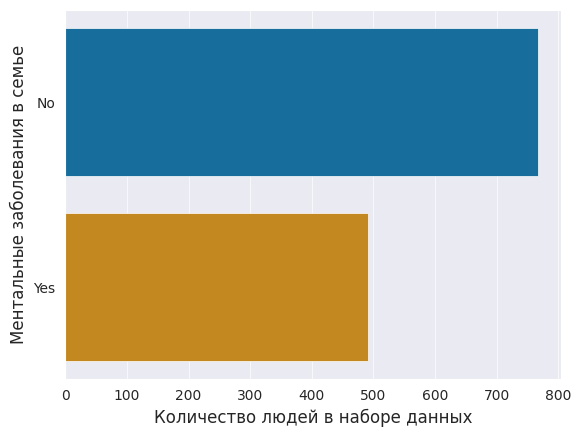

In [61]:
#Соотношение между количеством людей в выборке и тем, были ли в их семье проблемы с ментальным здоровьем
sns.set_style('darkgrid')
sns.countplot(y='family_history',data=data,palette='colorblind')
plt.xlabel('Количество людей в наборе данных')
plt.ylabel('Ментальные заболевания в семье')
plt.show()

Видим, что у большинства опрошенных не было родных с психологическими проблемами

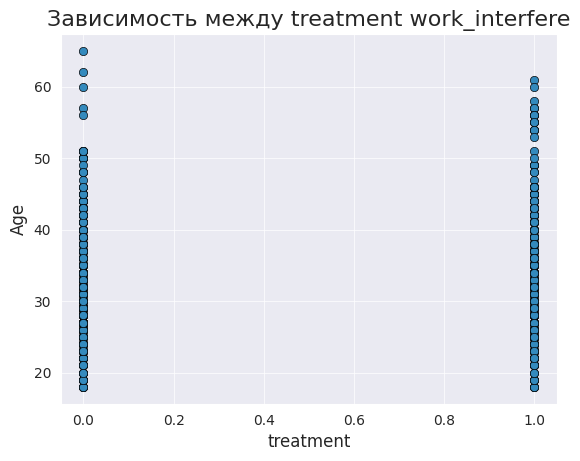

In [64]:
# Зависимость между возрастом и тем, обращались ли люди за психологической помощью к специалистам
# где 0 - это нет, а 1 - это да
sns.set_style('darkgrid')
plt.title('Зависимость между treatment work_interfere',size=16)
plt.xlabel('treatment',size=12)
plt.ylabel('Age',size=12)
sns.scatterplot(x='treatment', y='Age', data=data2,  edgecolor='black', palette='cubehelix')
plt.show()

Видим, что зависимости как таковой нет

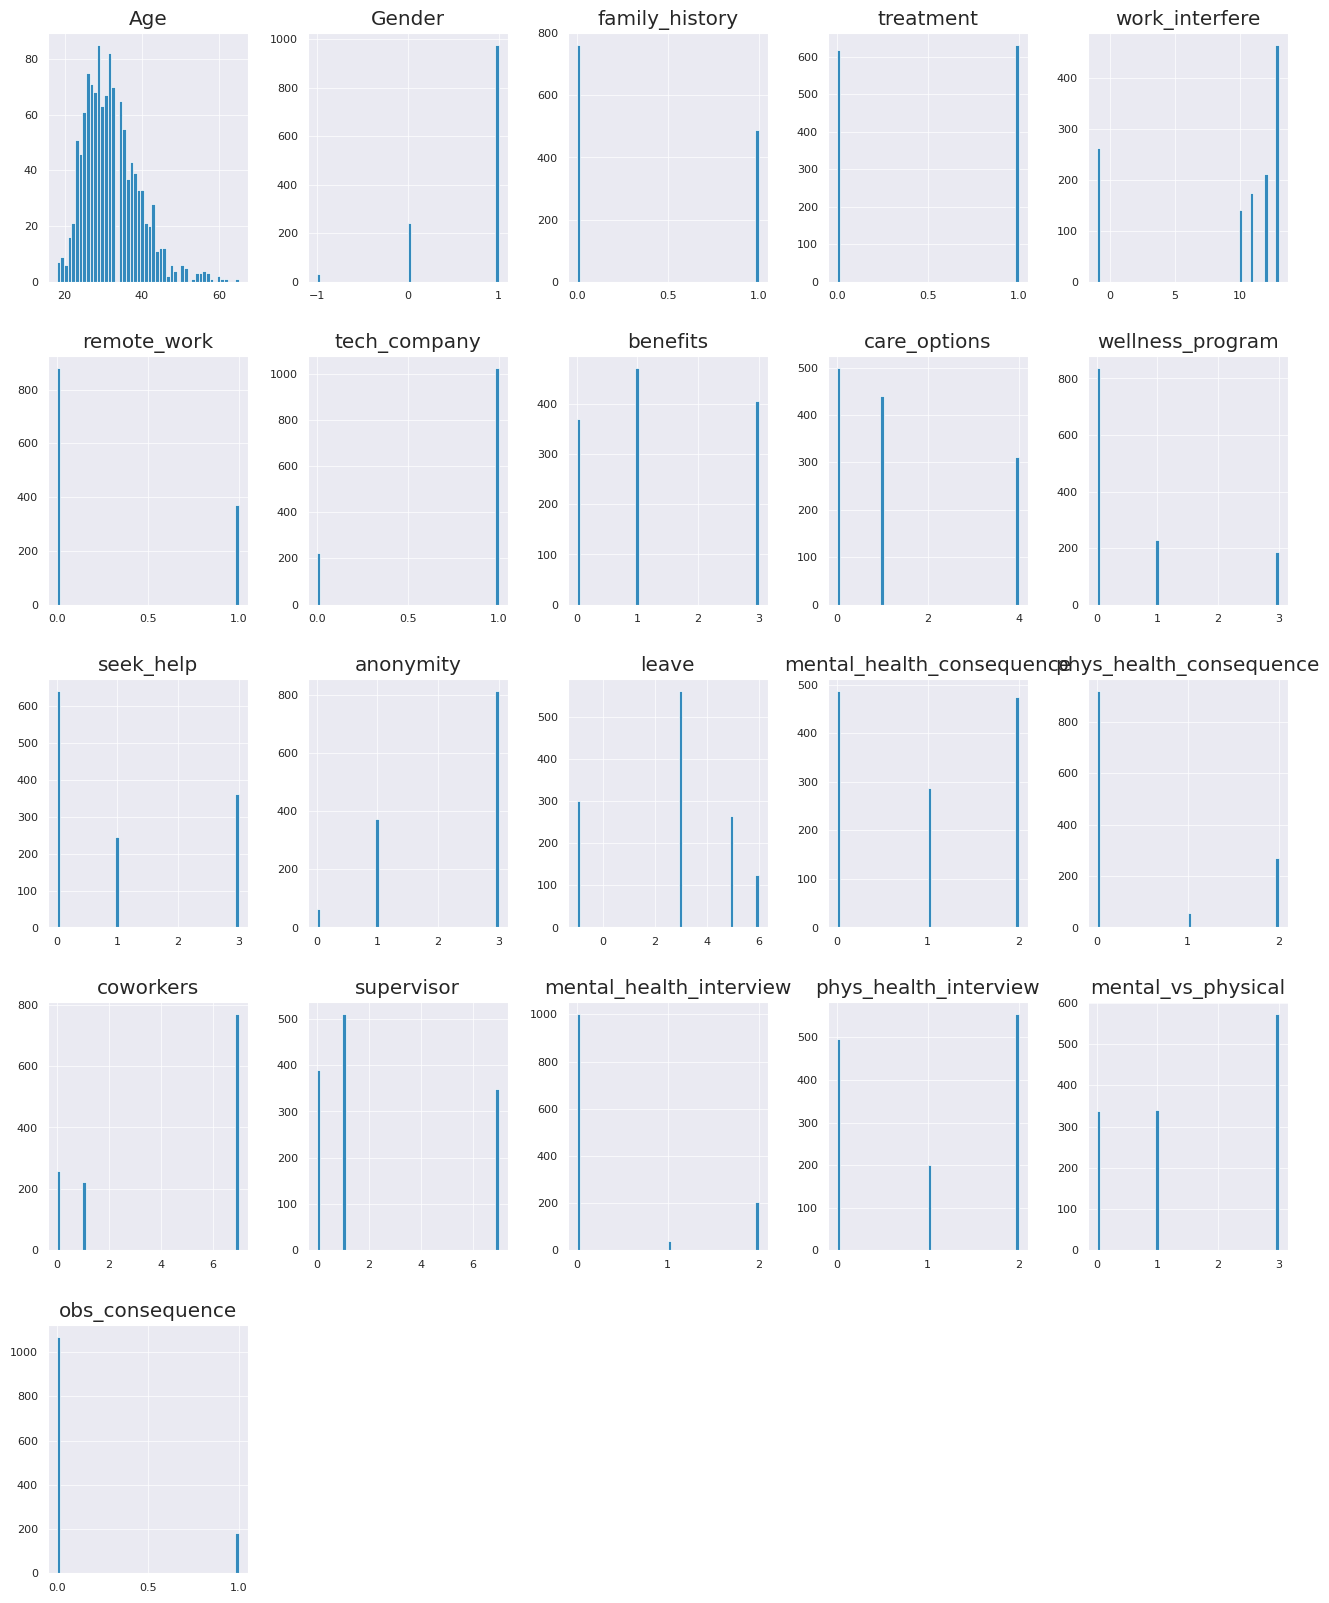

In [65]:
# гистограммы распределения значений признаков
data2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);